# South African Language Identification Hack 2022


### EDSA 2201 & 2207 classification hackathon


#### Data Description


The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

File descriptions

train_set.csv - the training set

test_set.csv - the test set

sample_submission.csv - a sample submission file in the correct format

Language IDs

* afr - Afrikaans
* eng - English
* nbl - isiNdebele
* nso - Sepedi
* sot - Sesotho
* ssw - siSwati
* tsn - Setswana
* tso - Xitsonga
* ven - Tshivenda
* xho - isiXhosa
* zul - isiZulu

EXPLORE Data Science Academy Classification Hackathon
Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### 1. Import Relevant packages

In [40]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import KFold
from flaml import AutoML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier



# set plot style
sns.set()
import os
import sys
print(sys.executable)
import warnings

warnings.filterwarnings("ignore")


C:\Users\9804305066082\Anaconda3\python.exe


In [25]:
df_train=pd.read_csv('train_set.csv')
df_train_compare=pd.read_csv('train_set.csv')
df_test=pd.read_csv('test_set.csv')

In [26]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [27]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### 2. Understand Class imbalance


<AxesSubplot:>

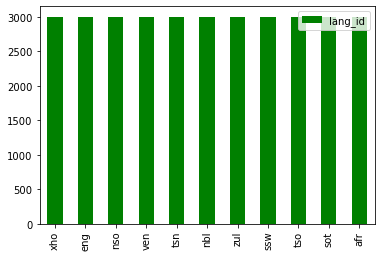

In [28]:
x=df_train.lang_id.value_counts()
x_df=pd.DataFrame(x)
x_df.plot.bar(color= "green")

In [51]:
x.index

Index(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot',
       'afr'],
      dtype='object')

The above graph shows that there are no class imbalances

## 3. Cleaning the Data

* 3.1. Convert words to lower Case  
* 3.2. Remove Urls
* 3.3. Removing punctuations


### 3.1. Convert words to lower Case

All Tweets are converted to lower case because when vectorization of tweets are done, lower and upper case numbers will be treated as different dimensions even thou some words may hold the same meaning. E.g. Love and love mean the same thing but will be considered different features when vectorized

In [30]:
from nltk.corpus import stopwords
df_train['text']=df_train['text'].str.lower()
df_test['text']=df_test['text'].str.lower()

#Compare Sentence before and after lower case implementation

print("Sample sentence BEFORE LowerCase:\n",df_train_compare['text'][0])
print("\nSample sentence AFTER LowerCase:\n",df_train['text'][0])

Sample sentence BEFORE LowerCase:
 umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika

Sample sentence AFTER LowerCase:
 umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika


### 3.2. Remove URLS
|URLS are removed as this is considered as noise|

In [31]:
#Remove URLS
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['text'] = df_train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['text'] = df_test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)


print("Sample sentence BEFORE Removing URLS:\n",df_train_compare['text'][0])
print("\nSample sentence AFTER Removing URLS:\n",df_train['text'][0])

Sample sentence BEFORE Removing URLS:
 umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika

Sample sentence AFTER Removing URLS:
 umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika


### 3.3. Removing punctuations
|Puncuations are removed because it is considered as noise and does not add value to features created|

In [33]:
#Removing punctuations
import string
def remove_punctuation(post):
    return ''.join([x for x in post if x not in string.punctuation])
df_train['text']=df_train['text'].apply(remove_punctuation)
df_test['text']=df_test['text'].apply(remove_punctuation)


df_train['text'].head(10)

print("Sample sentence BEFORE Removing punctuations:\n",df_train_compare['text'][0])
print("\nSample sentence AFTER Removing punctuations:\n",df_train['text'][0])

Sample sentence BEFORE Removing punctuations:
 umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika

Sample sentence AFTER Removing punctuations:
 umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika


### 4. Model Creation

* 4.1. Logistic Regression
* 4.2. Linear SVC
* 4.3. Naive bayes 

In [42]:
# Model creation function
def model_creation(features,target, model):
    
    #Split the data 
#     scaler = preprocessing.MinMaxScaler()
#     features_scaled = scaler.fit_transform(features)

    X_train,X_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=40)

    
    
    #Fit the data to the model
    txt_clf=model.fit(X_train,y_train)
    
    #Make predictions
    y_train_predict=model.predict(X_train)
    y_test_predict=model.predict(X_test)
    
    return X_train,X_test,y_train,y_test,y_train_predict,y_test_predict,txt_clf

In [43]:
# Model Evaluation function

def model_evaluation(y_train,y_test,y_train_predict,y_test_predict,model):
    
    
    train_accuracy=metrics.accuracy_score(y_train,y_train_predict)
    test_accuracy=metrics.accuracy_score(y_test,y_test_predict)
    
    train_recall=metrics.recall_score(y_train,y_train_predict,average='weighted')
    test_recall=metrics.recall_score(y_test,y_test_predict,average='weighted')
    
    train_precision=metrics.precision_score(y_train,y_train_predict,average='weighted')
    test_precision=metrics.precision_score(y_test,y_test_predict,average='weighted')
    
    train_F1=metrics.f1_score(y_train,y_train_predict,average='weighted')
    test_F1=metrics.f1_score(y_test,y_test_predict,average='weighted')


    
    Model_results_dict= {'Train Set '+model.__class__.__name__+' Results':{
                "accuracy": train_accuracy,
                "recall": train_recall,
                "precision": train_precision,
                "f1": train_F1
                                    },
                 
                'Test Set '+model.__class__.__name__+' Results':{
                "accuracy": test_accuracy,
                "recall": test_recall,
                "precision": test_precision,
                "f1": test_F1}
                        }
    Model_results_df=pd.DataFrame(data=Model_results_dict)
    
    print("\n*** " + model.__class__.__name__ + " ***")
    
    return (Model_results_df)#train_metrics_df,test_metrics_df

In [52]:
def ConfusionMatrix(y_train,y_test,y_train_predict,y_test_predict,model):

    # print a simple confusion matrix
    cm_test = metrics.confusion_matrix(y_test.values, y_test_predict)
    cm_train = metrics.confusion_matrix(y_train.values, y_train_predict)

    
    #'xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot','afr'
    
    # Show confusion matrix with colored background.
    Index = ['Actual afr', 'Actual sot', 'Actual tso', 'Actual ssw','Actual zul','Actual nbl','Actual tsn','Actual ven','Actual nso','Actual eng','Actual xho']
    Cols = ['Predit afr', 'Predit sot', 'Predit tso', 'Predit ssw','Predit zul','Predit nbl','Predit tsn','Predit ven','Predit nso','Predit eng','Predit xho']
    df = pd.DataFrame(cm_test, index=Index, columns=Cols)
    df_train = pd.DataFrame(cm_train, index=Index, columns=Cols)


    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

    #fig.subplots_adjust(wspace=0.01)

    ax1 = sns.heatmap(df_train, cmap='Greens', annot=True, fmt='g',ax=ax1)
    bottom, top = ax1.get_ylim()
    ax1.set(title=' Train Set ' + model.__class__.__name__)
    ax1.set_ylim(bottom + 0.5, top - 0.5)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30,
                       horizontalalignment='right')
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0,
                       horizontalalignment='right')
    


    ax2 = sns.heatmap(df, cmap='Blues', annot=True, fmt='g')
    bottom, top = ax2.get_ylim()
    ax2.set(title=' Test Set ' + model.__class__.__name__)
    ax2.set_ylim(bottom + 0.5, top - 0.5)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30,horizontalalignment='right')
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, horizontalalignment='right')

    plt.show()

In [53]:
df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [54]:
df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [55]:
#Input data into the model
Unseen_data=df_test['text']

X=df_train['text']
y=df_train['lang_id']

### 4.1. Logistic Regression


*** LogisticRegression ***


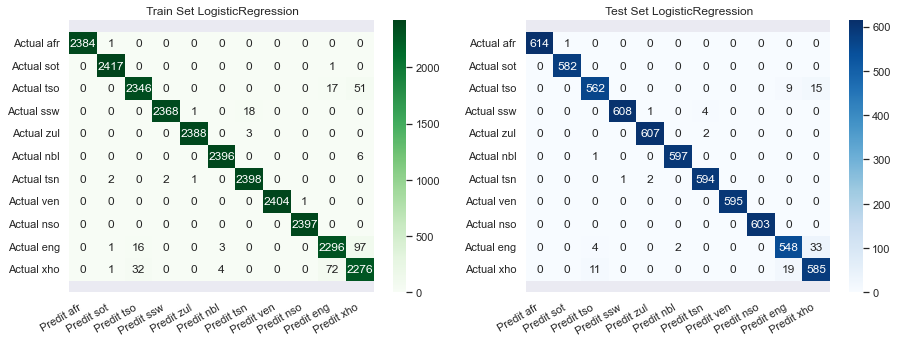

,Train Set LogisticRegression Results,Test Set LogisticRegression Results
accuracy,0.987500,0.984091
recall,0.987500,0.984091
precision,0.987559,0.984188
f1,0.987516,0.984108


In [60]:
model_logisticReg = Pipeline([('tfidf_Vector', TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
                     ('Classification_model',LogisticRegression()),
])

X_train,X_test,y_train,y_test,y_train_predict,y_test_predict,txt_clf=model_creation(X,y, model_logisticReg)


model = LogisticRegression()
Model_results_df=model_evaluation(y_train,y_test,y_train_predict,y_test_predict,model)
ConfusionMatrix(y_train,y_test,y_train_predict,y_test_predict,model)
Train_log_reg=Model_results_df._get_value('f1', 'Train Set LogisticRegression Results')
Test_log_reg=Model_results_df._get_value('f1', 'Test Set LogisticRegression Results')

Model_results_df

### 4.2. Linear Support Vector Classifiers


*** LinearSVC ***


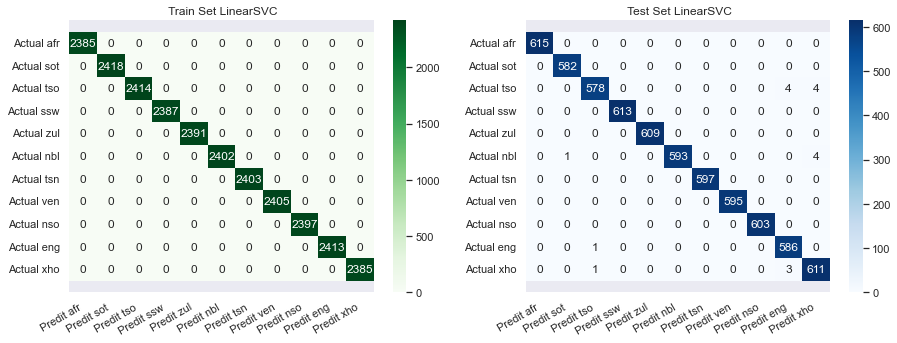

,Train Set LinearSVC Results,Test Set LinearSVC Results
accuracy,1.0,0.997273
recall,1.0,0.997273
precision,1.0,0.997288
f1,1.0,0.997273


In [62]:
model_SVC = Pipeline([('tfidf_Vector', TfidfVectorizer(
                             ngram_range=(1, 2))),
                     ('Classification_model',LinearSVC()),])

X_train,X_test,y_train,y_test,y_train_predict,y_test_predict,txt_clf=model_creation(X,y, model_SVC)


model = LinearSVC()
Model_results_df=model_evaluation(y_train,y_test,y_train_predict,y_test_predict,model)
ConfusionMatrix(y_train,y_test,y_train_predict,y_test_predict,model)
Train_Set_LinearSVC=Model_results_df._get_value('f1', 'Train Set LinearSVC Results')
Test_Set_LinearSVC=Model_results_df._get_value('f1', 'Test Set LinearSVC Results')
Model_results_df

In [63]:
print("\n\nClassification Report:\n\n",classification_report(y_test, y_test_predict)) 



Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       615
         eng       1.00      1.00      1.00       582
         nbl       1.00      0.99      0.99       586
         nso       1.00      1.00      1.00       613
         sot       1.00      1.00      1.00       609
         ssw       1.00      0.99      1.00       598
         tsn       1.00      1.00      1.00       597
         tso       1.00      1.00      1.00       595
         ven       1.00      1.00      1.00       603
         xho       0.99      1.00      0.99       587
         zul       0.99      0.99      0.99       615

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### 4.3 Naive Bayes


*** MultinomialNB ***


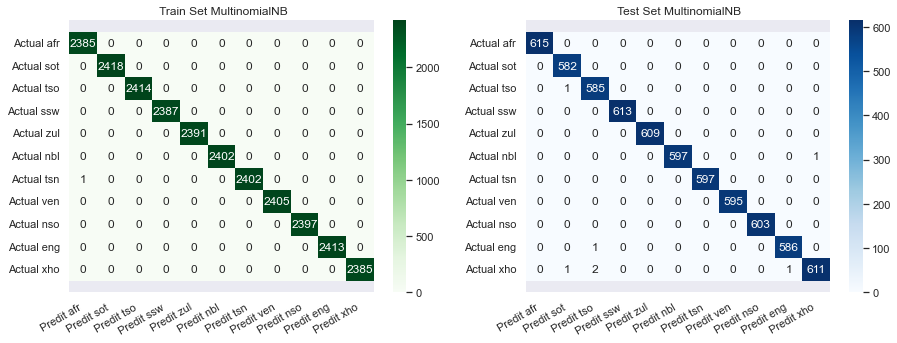

,Train Set MultinomialNB Results,Test Set MultinomialNB Results
accuracy,0.999962,0.998939
recall,0.999962,0.998939
precision,0.999962,0.998941
f1,0.999962,0.998939


In [66]:
model_NaviveBayes= Pipeline([('tfidf_Vector', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('Classification_model',MultinomialNB()),])

X_train,X_test,y_train,y_test,y_train_predict,y_test_predict,txt_clf=model_creation(X,y, model_NaviveBayes)


model = MultinomialNB()
Model_results_df=model_evaluation(y_train,y_test,y_train_predict,y_test_predict,model)
ConfusionMatrix(y_train,y_test,y_train_predict,y_test_predict,model)

Train_Set_MultinomialNB=Model_results_df._get_value('f1', 'Train Set MultinomialNB Results')
Test_Set_MultinomialNB=Model_results_df._get_value('f1', 'Test Set MultinomialNB Results')
Model_results_df

The Naive bayes model produces the highest f1 score and accuracy 

### Submission Report

In [67]:
y_testSubmission_pred= txt_clf.predict(df_test['text'])

submission = pd.DataFrame({'index':df_test['index'],
                          'lang_id':y_testSubmission_pred})

In [68]:
submission.to_csv('JoshanDooki_Classification_Hackathon NaiveBayes.csv',index=False)